<a href="https://colab.research.google.com/github/aarna97pandey/MIDASS-IIITD-Summer-Internship-Task/blob/master/Computer%20Vision/Computer_vision_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Connecting the notebook to the Drive file
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# import the gdrive
from google.colab import drive

In [0]:
#libraries for preprocessing
%matplotlib inline 
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

In [127]:
train_setX=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi Assignment/Vision_task_dataset_public/train_image.pkl', 'rb') as files:
      train_setX=pickle.load(files)

train_setY=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi Assignment/Vision_task_dataset_public/train_label.pkl', 'rb') as files:
    train_setY = pickle.load(files)
 
  
Img = len(train_setX)     # no images in train set
print(Img)   
print(len(train_setY))    # no of labels
print(len(train_setX[0])) # heightXWidth       

8000
8000
784


In [0]:
nR = 28
nC = 28

In [146]:
nBytesTotal = Img*nR*nC*1#since each pixel data is 1 byte
print(nBytesTotal)
train_image_array = np.array(train_setX)/255
train_image_array= image_array.reshape(Img,nR, nC)
train_image_array= np.array(image_array)

6272000


In [138]:
test_setX=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi Assignment/Vision_task_dataset_public/test_image.pkl', 'rb') as files:
      test_setX=pickle.load(files)
print(len(test_setX))   # no images in test set    
print(len(test_setX[0]))

test_image_array= np.array(test_setX)/255
test_image_array =test_image_array.reshape(2000, nR, nC)
test_image_array = np.array(test_image_array)

2000
784


In [152]:
train_label_array = np.array(train_setY).reshape(len(train_setY),1)
#print(train_label_array)

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
encoded_train_label_array = labelencoder_y.fit_transform(train_label_array)
encoded_train_label_array = encoded_train_label_array.reshape(Img,1)
print(encoded_train_label_array)

[[0]
 [0]
 [0]
 ...
 [3]
 [3]
 [3]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


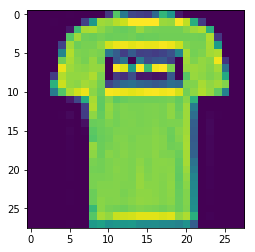

In [144]:
x = Image_array[0]
plt.imshow(x)

#Machine Learning

In [0]:
# Fitting K-NN to the Training set
_array = np.array(train_setX).reshape(8000, 28*28)
x_train= _array
y_train=train_setY
_array_test = np.array(test_setX).reshape(2000,28*28)
x_test= _array_test


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=4)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))



0.7825


In [0]:
# trying naive bayes classification
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 62.81250000000001


#  Building the training model  # CNN

In [0]:
# Importing Libraries for training dataset
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
batch_size = 200
epochs = 20
num_classes = 4

In [153]:
x_train = train_image_array
y_train = encoded_train_label_array
print(y_train.shape)

(8000, 1)


In [0]:
x_test = test_image_array

In [0]:
x_train = x_train.reshape(8000,28,28,1)


In [0]:
x_test = x_test.reshape(2000,28,28,1)

In [157]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('Y train: ', y_train.shape)


x_train shape: (8000, 28, 28, 1)
8000 train samples
Y train:  (8000, 1)


In [158]:
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')

x_test shape: (2000, 28, 28, 1)
2000 test samples


In [159]:

y_train = keras.utils.to_categorical(y,num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[7000])

[0. 0. 0. 1.]


In [0]:
classifier = Sequential()


In [0]:
input_shape = (28, 28, 1)

In [0]:
#CONVOLUTION MODEL BUILT

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))


In [0]:
classifier.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [169]:
classifier.fit(x = x_train, y = y_train, 
          validation_split=0.1, 
          batch_size = batch_size, 
          verbose=2, 
          epochs=epochs)



Train on 7200 samples, validate on 800 samples
Epoch 1/20
 - 7s - loss: 1.1510 - acc: 0.5099 - val_loss: 2.0398 - val_acc: 0.0000e+00
Epoch 2/20
 - 7s - loss: 0.7756 - acc: 0.7024 - val_loss: 1.6748 - val_acc: 0.0262
Epoch 3/20
 - 7s - loss: 0.6806 - acc: 0.7318 - val_loss: 1.6073 - val_acc: 0.0287
Epoch 4/20
 - 7s - loss: 0.6377 - acc: 0.7397 - val_loss: 1.8995 - val_acc: 0.0125
Epoch 5/20
 - 7s - loss: 0.6177 - acc: 0.7472 - val_loss: 1.6924 - val_acc: 0.0062
Epoch 6/20
 - 7s - loss: 0.5851 - acc: 0.7657 - val_loss: 1.4051 - val_acc: 0.0700
Epoch 7/20
 - 8s - loss: 0.5647 - acc: 0.7737 - val_loss: 1.2239 - val_acc: 0.2950
Epoch 8/20
 - 7s - loss: 0.5332 - acc: 0.7885 - val_loss: 1.1570 - val_acc: 0.3713
Epoch 9/20
 - 8s - loss: 0.5087 - acc: 0.8022 - val_loss: 1.2900 - val_acc: 0.3263
Epoch 10/20
 - 8s - loss: 0.4791 - acc: 0.8115 - val_loss: 1.1563 - val_acc: 0.3787
Epoch 11/20
 - 7s - loss: 0.4587 - acc: 0.8239 - val_loss: 0.6734 - val_acc: 0.6575
Epoch 12/20
 - 7s - loss: 0.4499 -

NameError: ignored

In [172]:

predictions = classifier.predict(x_test)
print(predictions)


[[9.46962953e-01 1.03357066e-04 3.11562937e-04 5.26220091e-02]
 [5.88007033e-01 2.16927491e-02 4.97653522e-02 3.40534896e-01]
 [8.34456861e-01 6.59859157e-04 5.44958282e-04 1.64338440e-01]
 ...
 [3.57698292e-01 3.38335074e-02 1.15336888e-01 4.93131340e-01]
 [6.01575477e-04 1.73920882e-03 7.01953031e-05 9.97588992e-01]
 [3.19402921e-03 3.15531611e-01 5.26887178e-03 6.76005483e-01]]


In [74]:
import csv
with open('persons.csv', 'wb') as csvfile:
  filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
  k=0
  filewriter.writerow("Test_image_index", "predicted class")
  #for i in predictions:
   # p = str(k)
    #q= str(i)
    #filewriter.writerow()
     # filewriter.writerow()
    #k= k+1

TypeError: ignored